Hello this is My Url to QR project where you can put URL and download QR easily and for free. Please DO as per instruction Below

In [76]:
!pip install qrcode[pil] ###### Only Run this for First time setup  ######


In [77]:
import os
############  ONLY for First Time Setup ##############


# Function to create a folder named "QR" in /content/ directory
def create_qr_folder():
    folder_path = '/content/QR'
    try:
        os.makedirs(folder_path, exist_ok=True)
        print(f"Folder '{folder_path}' created successfully.")
    except Exception as e:
        print(f"Error creating folder: {e}")

# Example usage
create_qr_folder()


Folder '/content/QR' created successfully.


In [78]:
!rm -rf /content/QR/* ###### Only Run this , If you want to Clear old QR that may got saved in temporary  ######

***IF you did above steps Please start from here Always .... ***

Text(value='', description='URL:', placeholder='Enter URL here')

Button(button_style='info', description='Generate QR', icon='qrcode', style=ButtonStyle(), tooltip='Generate Q…

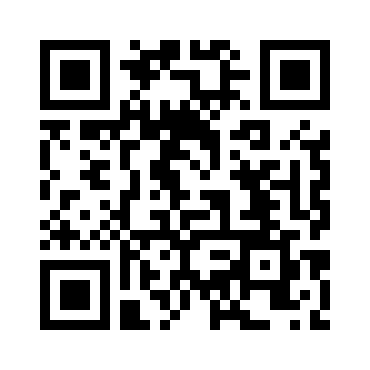

Text(value='qrcode', description='Filename:', placeholder='Enter filename')

Button(button_style='success', description='Download QR', icon='download', style=ButtonStyle(), tooltip='Downl…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
import qrcode
from PIL import Image
from google.colab import files
import ipywidgets as widgets
import os

# Function to generate QR code from a URL and return the QR code image object
def generate_qr(url):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(url)
    qr.make(fit=True)

    qr_img = qr.make_image(fill_color="black", back_color="white")
    return qr_img

# Function to download a QR code image given its image object and filename
def download_qr(qr_img, filename):
    qr_img_path = f"/content/QR/{filename}.png"  # Save QR code with specified filename
    qr_img.save(qr_img_path)
    files.download(qr_img_path)


# UI elements
url_textbox = widgets.Text(
    value='',
    placeholder='Enter URL here',
    description='URL:',
    disabled=False
)

generate_button = widgets.Button(
    description='Generate QR',
    disabled=False,
    button_style='info',  # Change button color to 'info'
    tooltip='Generate QR Code',
    icon='qrcode'  # Change icon to QR code icon
)

# Event handler for generating QR code
def on_generate_clicked(b):
    url = url_textbox.value.strip()
    if url:
        qr_img = generate_qr(url)
        display(qr_img, fn_input, download_button)  # Display QR image, filename input, and download button
    else:
        print("Please enter a valid URL.")

generate_button.on_click(on_generate_clicked)

# Filename input and download button (initially hidden)
fn_input = widgets.Text(
    value='qrcode',
    placeholder='Enter filename',
    description='Filename:',
    disabled=False
)

download_button = widgets.Button(
    description='Download QR',
    disabled=False,  # Disable download button initially
    button_style='success',  # Change button color to 'success'
    tooltip='Download QR Code',
    icon='download'  # Change icon to download icon
)

# Event handler for downloading QR code
def on_download_clicked(b):
    filename = fn_input.value.strip()
    qr_img = generate_qr(url_textbox.value.strip())
    if qr_img:
        download_qr(qr_img, filename)
    else:
        print("Please generate a QR code first.")

download_button.on_click(on_download_clicked)

# Display initial UI (URL input and Generate button)
display(url_textbox, generate_button)


**Please Click This Below cell to flush your temporary memory**. ⬇

In [80]:
# Delete the temporary QR code image after download
qr_img_path = f"/content/QR/{fn_input.value.strip()}.png"
os.remove(qr_img_path)

**In case you forgot Below Cell will Flush them in Bulk**

In [81]:
!rm -rf /content/QR/*